## Principle Component Analysis (PCA) | Full Case-Study (Wine)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

: 

#### Import Dataset

In [40]:
df = pd.read_csv(r'G:\Udemy Courses Files\Python Machine Learning Diploma\4-Dimensional Reduction(PCA)\datasets\wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [41]:
X = df.iloc[:, :-1].values
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [42]:
y = df.iloc[:, -1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

#### Extracting Features

------------------------------------------------------------

Note: We have a labelled data so we can split the data 

------------------------------------------------------------

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Pre-processing (Feature Scaling)

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [46]:
X_train.shape 

(142, 13)

In [47]:
X_test.shape

(36, 13)

#### Reducing Dimensions (PCA) => Reduce the dimensions (13 Features)

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=2)

In [50]:
X_train = pca.fit_transform(X_train)

In [51]:
X_test = pca.transform(X_test)

In [53]:
X_train.shape

(142, 2)

In [54]:
X_test.shape

(36, 2)

Text(0, 0.5, 'PCA 2')

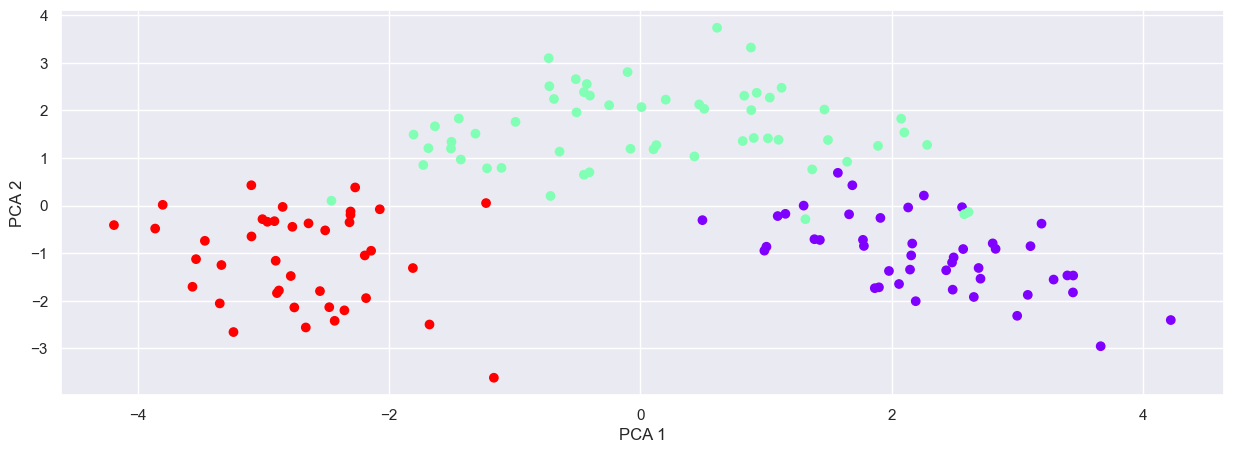

In [55]:
plt.figure(figsize=(15,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='rainbow', )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [61]:
pca.components_     

array([[ 0.12753249, -0.25623655, -0.02236181, -0.24428137,  0.14757757,
         0.38490786,  0.41950095, -0.2992598 ,  0.30843734, -0.11907301,
         0.29949964,  0.38381622,  0.27587548],
       [-0.4928047 , -0.1904464 , -0.31676447,  0.03513857, -0.26217161,
        -0.09601687, -0.01513129, -0.07626286, -0.0738558 , -0.53396728,
         0.28133315,  0.14274046, -0.381054  ]])

In [62]:
pca.explained_variance_     

array([4.7001079 , 2.44718518])

--------------------

Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method.


i.e. sum of variances of all individual principal components
--------------------


In [63]:
pca.explained_variance_ratio_   # percentage of variance explained ( PC1 + PC2 Describes 0.35+0.18 = 0.53 of data )

array([0.35900066, 0.18691934])

#### Training Another Model (Logistic Regression)

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Evaluating Final Model

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
y_pred  # predicted values

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1], dtype=int64)

In [58]:
y_test      # actual values ( y actual)

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1], dtype=int64)

In [59]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [60]:
accuracy_score(y_test, y_pred)

1.0

**Thank You**